In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    
%matplotlib inline

plt.rcParams["axes.grid"] = True

D:\Anaconda3\envs\jenv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('data.csv', index_col=None, sep=",")

In [3]:
print(df)

                 name  followers  followings  foll. ratio  muters        rep  \
0             beggars       1144          66     0.057692       4  58.485711   
1     anthonyadavisii       3477        2295     0.660052      19  59.185663   
2           amvanaken       3026         175     0.057832      10  60.324424   
3       shaikhraz1986        229          11     0.048035       3  46.766451   
4            harpagon        306          39     0.127451       0  55.577631   
5               famil        661         274     0.414523       3  58.858699   
6           swapsteem        197          31     0.157360       0  39.812361   
7            kr-nahid        773         366     0.473480       6  58.179101   
8        thefairypark        153           1     0.006536       0  32.825241   
9             eosbake        115           0     0.000000       0  25.000000   
10      official-hord        619         139     0.224556       0  59.131711   
11           kretorkk        517        

In [4]:
print('Attribute|User avg|Bid-bot avg')
print('-|-|-')
for column in ['followers', 'followings', 'foll. ratio', 'muters', 'rep', 'eff. sp', 'own sp', 'sp ratio']:
    print('%s|%.3f|%.3f' % (column, df[df['bid-bot?'] == 0][column].mean(), df[df['bid-bot?'] == 1][column].mean()))

Attribute|User avg|Bid-bot avg
-|-|-
followers|1078.974|1926.841
followings|382.238|204.068
foll. ratio|0.389|0.170
muters|3.524|12.330
rep|55.065|45.564
eff. sp|5494.488|224684.003
own sp|2110.639|13383.966
sp ratio|18.165|126.915


In [5]:
df1 = df[df['followings'] < 10000]
df1 = df1[df1['followers'] < 10000]
df1 = df1[df1['sp ratio'] < 500]
df1 = df1[df1['foll. ratio'] < 5]

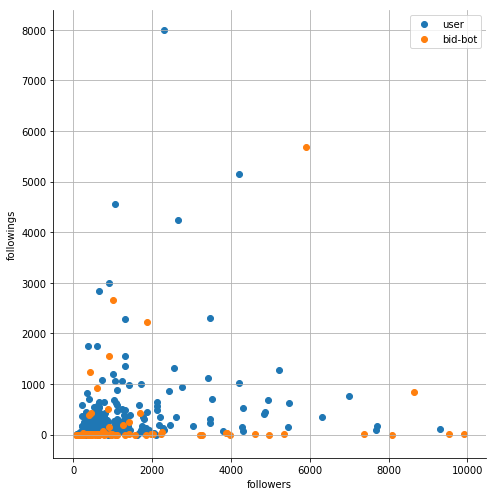

In [6]:
sns.FacetGrid(df1, hue="bid-bot?", size=7).map(plt.scatter, "followers", "followings")
plt.legend(['user', 'bid-bot'])

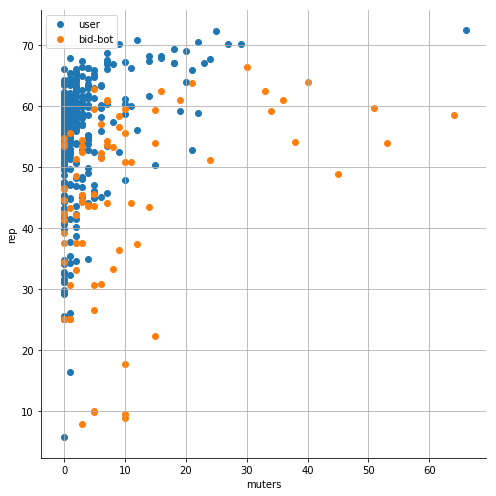

In [7]:
sns.FacetGrid(df1, hue="bid-bot?", size=7).map(plt.scatter, "muters", "rep")
plt.legend(['user', 'bid-bot'])

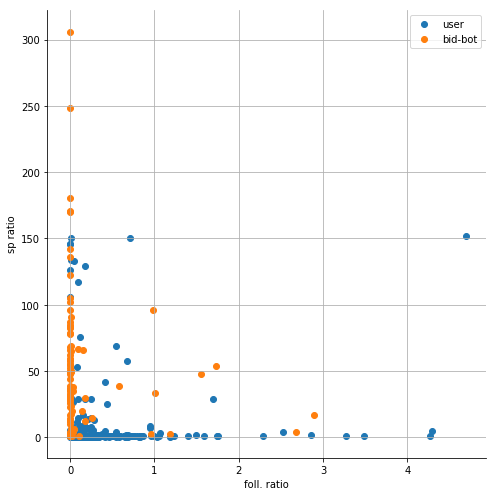

In [8]:
sns.FacetGrid(df1, hue="bid-bot?", size=7).map(plt.scatter, "foll. ratio", "sp ratio")
plt.legend(['user', 'bid-bot'])

In [9]:
X_cols = ['followers', 'followings', 'foll. ratio', 'muters', 'rep', 'eff. sp', 'own sp', 'sp ratio']
y_cols = ['bid-bot?']
X = df[X_cols].apply(pd.to_numeric)
y = df[y_cols].apply(pd.to_numeric)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
model = Sequential()
model.add(Dense(24, activation='relu', input_dim=8))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
                   
model.fit(X_train, y_train,epochs=50, batch_size=1, verbose=1)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
305/305 [==============================] - 0s 1ms/step - loss: 3.0651 - acc: 0.8098
Epoch 2/50
305/305 [==============================] - 0s 1ms/step - loss: 3.0651 - acc: 0.8098
Epoch 3/50
305/305 [==============================] - 0s 1ms/step - loss: 3.0651 - acc: 0.8098
Epoch 4/50
305/305 [==============================] - 0s 1ms/step - loss: 3.0651 - acc: 0.8098
Epoch 5/50
305/305 [========

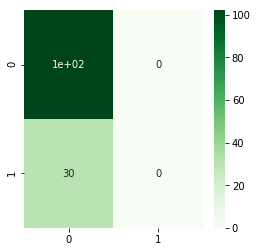

In [11]:
plt.figure(figsize = (4, 4))
sns.heatmap(cm, annot=True, cmap="Greens")

In [12]:
print('precision:', precision_score(y_test, y_pred),
      '\nrecall:', recall_score(y_test, y_pred),
      '\nf1:', f1_score(y_test, y_pred))

precision: 0.0 
recall: 0.0 
f1: 0.0


D:\Anaconda3\envs\jenv\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\envs\jenv\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 1/50
305/305 [==============================] - 0s 1ms/step - loss: 0.3813 - acc: 0.8262
Epoch 2/50
305/305 [==============================] - 0s 1ms/step - loss: 0.3113 - acc: 0.8689
Epoch 3/50
305/305 [==============================] - 0s 1ms/step - loss: 0.2827 - acc: 0.8820
Epoch 4/50
305/305 [==============================] - 0s 1ms/step - loss: 0.2657 - acc: 0.8820
Epoch 5/50
305/305 [==============================] - 0s 2ms/step - loss: 0.2463 - acc: 0.9049
Epoch 6/50
305/305 [==============================] - 0s 2ms/step - loss: 0.2395 - acc: 0.9049
Epoch 7/50
305/305 [==============================] - 0s 2ms/step - loss: 0.2334 - acc: 0.9016
Epoch 8/50
305/305 [==============================] - 0s 1ms/step - loss: 0.2241 - acc: 0.8984A: 0s - loss: 0.2202 - acc: 0.902
Epoch 9/50
305/305 [==============================] - 0s 2ms/step - loss: 0.2234 - acc: 0.8984
Epoch 10/50
305/305 [==============================] - 0s 2ms/step - loss: 0.2133 - acc: 0.9115
Epoch 11/50
305/

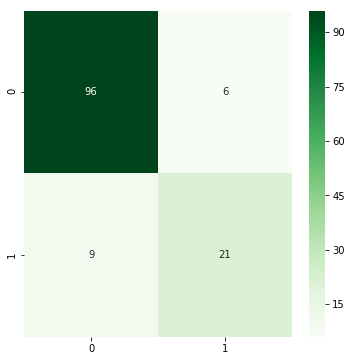

In [13]:
X = df[X_cols]
y = df[y_cols]
X = pd.DataFrame(StandardScaler().fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train,epochs=50, batch_size=1, verbose=1)
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot=True, cmap="Greens")
print('precision:', precision_score(y_test, y_pred),
      '\nrecall:', recall_score(y_test, y_pred),
      '\nf1:', f1_score(y_test, y_pred))

Epoch 1/50
305/305 [==============================] - 0s 927us/step - loss: 0.3265 - acc: 0.9016
Epoch 2/50
305/305 [==============================] - 0s 903us/step - loss: 0.2292 - acc: 0.9344
Epoch 3/50
305/305 [==============================] - 0s 1ms/step - loss: 0.1851 - acc: 0.9443 ETA: 0s - loss: 0.1892 - acc: 0.
Epoch 4/50
305/305 [==============================] - 0s 1ms/step - loss: 0.1580 - acc: 0.9508
Epoch 5/50
305/305 [==============================] - 0s 877us/step - loss: 0.1348 - acc: 0.9607
Epoch 6/50
305/305 [==============================] - 0s 907us/step - loss: 0.1204 - acc: 0.9574
Epoch 7/50
305/305 [==============================] - 0s 963us/step - loss: 0.1074 - acc: 0.9705
Epoch 8/50
305/305 [==============================] - 0s 1ms/step - loss: 0.0935 - acc: 0.9705
Epoch 9/50
305/305 [==============================] - 0s 894us/step - loss: 0.0915 - acc: 0.9738
Epoch 10/50
305/305 [==============================] - 0s 836us/step - loss: 0.0834 - acc: 0.9639
Ep

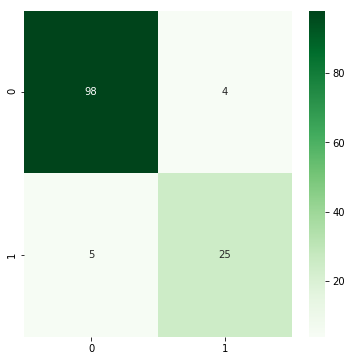

In [14]:
X = df.copy()[X_cols]
y = df.copy()[y_cols]
X = pd.DataFrame(QuantileTransformer().fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train,epochs=50, batch_size=1, verbose=1)
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot=True, cmap="Greens")
print('precision:', precision_score(y_test, y_pred),
      '\nrecall:', recall_score(y_test, y_pred),
      '\nf1:', f1_score(y_test, y_pred))

Epoch 1/10
305/305 [==============================] - 0s 1ms/step - loss: 0.0466 - acc: 0.9738
Epoch 2/10
305/305 [==============================] - 0s 1ms/step - loss: 0.0411 - acc: 0.9803
Epoch 3/10
305/305 [==============================] - 0s 813us/step - loss: 0.0434 - acc: 0.9803
Epoch 4/10
305/305 [==============================] - 0s 820us/step - loss: 0.0390 - acc: 0.9902
Epoch 5/10
305/305 [==============================] - 0s 946us/step - loss: 0.0413 - acc: 0.9836
Epoch 6/10
305/305 [==============================] - 0s 823us/step - loss: 0.0391 - acc: 0.9803
Epoch 7/10
305/305 [==============================] - 0s 829us/step - loss: 0.0472 - acc: 0.9836
Epoch 8/10
305/305 [==============================] - 0s 872us/step - loss: 0.0441 - acc: 0.9836
Epoch 9/10
305/305 [==============================] - 0s 955us/step - loss: 0.0415 - acc: 0.9836
Epoch 10/10
305/305 [==============================] - 0s 1ms/step - loss: 0.0435 - acc: 0.9738
precision: 0.8620689655172413 
reca

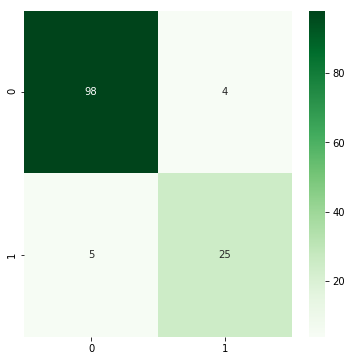

In [15]:
X = df.copy()[X_cols]
y = df.copy()[y_cols]
X = pd.DataFrame(QuantileTransformer().fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot=True, cmap="Greens")
print('precision:', precision_score(y_test, y_pred),
      '\nrecall:', recall_score(y_test, y_pred),
      '\nf1:', f1_score(y_test, y_pred))

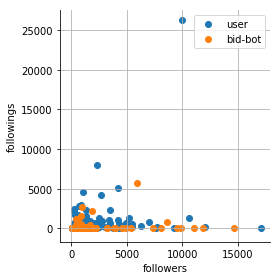

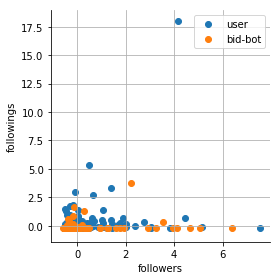

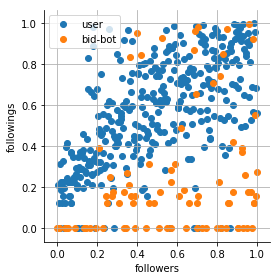

In [16]:
df1 = df.copy()
df1[X_cols] = StandardScaler().fit_transform(df1[X_cols])

df2 = df.copy()
df2[X_cols] = QuantileTransformer().fit_transform(df2[X_cols])

sns.FacetGrid(df, hue="bid-bot?", size=4, sharex=True).map(plt.scatter, "followers", "followings")
plt.legend(['user', 'bid-bot'])
sns.FacetGrid(df1, hue="bid-bot?", size=4, sharex=True).map(plt.scatter, "followers", "followings")
plt.legend(['user', 'bid-bot'])
sns.FacetGrid(df2, hue="bid-bot?", size=4, sharex=True).map(plt.scatter, "followers", "followings")
plt.legend(['user', 'bid-bot'])